Dataset: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [35]:
df = pd.read_csv('dataset/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [36]:
disease_count = df['cardio'].value_counts()
disease_count

cardio
0    35021
1    34979
Name: count, dtype: int64

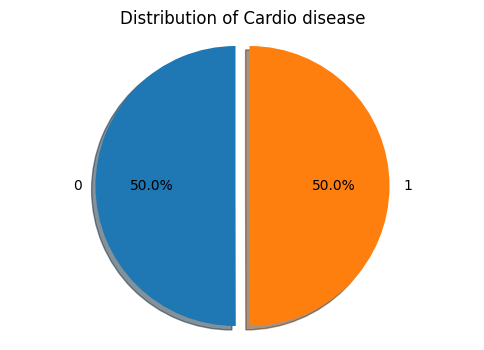

In [37]:
plt.figure(figsize=(6,4))
plt.pie(disease_count, labels=disease_count.index, autopct='%1.1f%%', startangle=90, explode=(0, 0.1), shadow=True)
plt.title('Distribution of Cardio disease')
plt.axis("equal")
plt.show()

In [38]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [39]:
df['age'] = (df['age']/365).round(0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [40]:
df.drop(columns=['id'], axis=1, inplace=True)

<Axes: xlabel='gender', ylabel='count'>

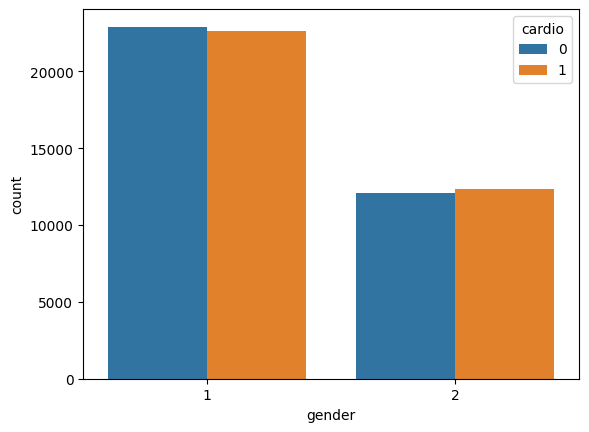

In [41]:
seaborn.countplot(x='gender', hue='cardio', data=df)

<Axes: xlabel='age', ylabel='count'>

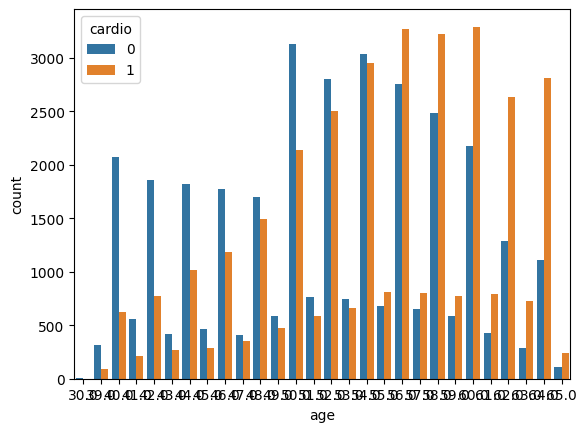

In [42]:
seaborn.countplot(x='age', hue='cardio', data=df)

## Separating Feature and Target

In [43]:
X = df.drop(columns=['cardio'], axis=1)
y = df[['cardio']]

In [44]:
from sklearn.preprocessing import StandardScaler
feature_x = StandardScaler().fit_transform(X)

feature_x

array([[-0.49350546,  1.36405487,  0.44345206, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [ 0.24556599, -0.73310834, -1.01816804, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-0.19787688, -0.73310834,  0.07804703, ..., -0.31087913,
        -0.23838436, -2.02360695],
       ...,
       [-0.19787688,  1.36405487,  2.27047718, ..., -0.31087913,
         4.19490608, -2.02360695],
       [ 1.13245175, -0.73310834, -0.16555632, ..., -0.31087913,
        -0.23838436, -2.02360695],
       [ 0.39338029, -0.73310834,  0.68705541, ..., -0.31087913,
        -0.23838436,  0.49416711]])

## Splitting Train Test

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_x, y, test_size=0.20, random_state=42)

## Model

In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=155)
model.fit(x_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,155
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
model.score(x_test, y_test)

0.7081428571428572